# **Experiment Notebook**



<hr>

## A. Project


In [ ]:
student_name = 'Shashikanth Senthil Kumar'

In [ ]:
student_id = '25218722'

In [ ]:
experiment_id = '3'

<hr>

## B. Experiment Description


In [ ]:
experiment_hypothesis = '* The hypothesis for this experiment is that higher values of the hyperparameter alpha (e.g., alpha=10, 100) will provide better predictive performance in Lasso Regression by effectively reducing overfitting and improve model generalization.'

In [ ]:
experiment_expectations = '\n* We expect higher alpha values to shrink irrelevant feature coefficients to zero, resulting in better generalization and lower RMSE values on validation and test datasets.\n* The model\'s performance with higher alpha values should demonstrate improved prediction accuracy by controlling overfitting while maintaining sufficient model complexity to capture the key patterns in the data.\n* Business Impact: A model with higher alpha values should produce more reliable predictions, helping stakeholders make more informed decisions with reduced uncertainty.'

<hr>

## C. Data Understanding


### C.0 Import Packages

In [ ]:
# Pandas for data handling
import pandas as pd

# Scikit Learn for ML training
import sklearn

# Altair for plotting
import altair as alt

# NumPy for numerical computations
import numpy as np

# Matplotlib for basic plotting
import matplotlib.pyplot as plt

# Ensures that Matplotlib plots are displayed inline in the notebook
%matplotlib inline

# Seaborn for statistical data visualization
import seaborn as sns


# Warnings module to suppress unwanted warnings
import warnings

# Suppress future warnings to make the output cleaner
warnings.simplefilter(action='ignore', category=FutureWarning)

<hr>

### C.1   Load Datasets

In [ ]:
# Load training set
# Do not change this code

X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

In [ ]:
# Load validation set
# Do not change this code

X_val = pd.read_csv('X_val.csv')
y_val = pd.read_csv('y_val.csv')

In [ ]:
# Load testing set
# Do not change this code

X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

<hr>

<hr>

## D. Feature Selection


In [ ]:
feature_selection_executive_summary = 'Use the same list of features from experiment 0.'

In [ ]:
# List of features selected for further analysis or modeling
features_list = ['10percentage', '12percentage','Degree', 'Specialization', 'collegeGPA', 
                 'English', 'Logical', 'Quant', 'Domain','ComputerProgramming', 'ElectronicsAndSemicon',
                 'ComputerScience','MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg','conscientiousness',
                 'agreeableness', 'extraversion', 'nueroticism','openess_to_experience', 'Salary']

In [ ]:
# List of features selected for further analysis or modeling
features_list = ['10percentage', '12percentage','Degree', 'Specialization', 'collegeGPA', 
                 'English', 'Logical', 'Quant', 'Domain','ComputerProgramming', 'ElectronicsAndSemicon',
                 'ComputerScience','MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg','conscientiousness',
                 'agreeableness', 'extraversion', 'nueroticism','openess_to_experience', 'Salary']

<hr>

## E. Train Machine Learning Model

In [ ]:
train_model_executive_summary = '\nIn this experiment, we tested the impact of the alpha hyperparameter in a Lasso Regression model:\n* Algorithm: We used sklearn\'s Lasso Regression with various alpha values to evaluate the effect of L1 regularization on model performance and feature selection.\n* Hyperparameters: Evaluated alpha values (0.01, 0.1, 1, 10, and 100) to assess their ability to reduce overfitting, improve generalization, and influence feature selection by shrinking some coefficients to zero.\n* Results: The model with alpha=1 provided the best balance between training, validation, and test RMSE, showing effective regularization and generalization. Lower alpha values (0.01, 0.1) led to insufficient regularization, while higher values like alpha=10 and alpha=100 resulted in underfitting and increased RMSE across datasets.\n\nConclusion: The Lasso Regression model with alpha=1 offers optimal predictive accuracy and generalization while managing overfitting effectively. It should be preferred for its balanced performance and ability to select important features, improving both interpretability and predictive power.'

### E.1 Import Algorithm

> Rationale:
Importing the Lasso Linear Regression algorithm is essential for evaluating how L1 regularization affects model performance, particularly in terms of feature selection and managing overfitting.Lasso regression performs feature selection by shrinking some coefficients to zero, potentially improving model interpretability.

In [ ]:
# Import Lasso regression from sklearn
from sklearn.linear_model import Lasso

<hr>

### E.2 Set Hyperparameters

> Rationale: 
* The alpha hyperparameter in Lasso Regression controls the strength of regularization.
* We will evaluate various alpha values to understand their impact on model performance and feature selection.
* Testing a range of alpha values helps determine the optimal level of regularization that balances bias and variance effectively.

In [ ]:
# Define hyperparameter values for alpha
alpha_values = [0.01,0.1, 1, 10, 100]

<hr>

### E.3 Fit Model

In [ ]:
# Import mean squared error function for performance evaluation
from sklearn.metrics import mean_squared_error

lasso_results = {}

for i in alpha_values:
    # Initialize and train the Lasso regression model
    la = Lasso(alpha=i)
    la.fit(X_train, y_train)
    
    # Make predictions
    train_preds = la.predict(X_train)
    val_preds = la.predict(X_val)
    test_preds = la.predict(X_test)
    
    # Calculate RMSE for training, validation, and test sets
    rmse_train = mean_squared_error(y_train, train_preds, squared=False)
    rmse_val = mean_squared_error(y_val, val_preds, squared=False)
    rmse_test = mean_squared_error(y_test, test_preds, squared=False)
    
    # Store results
    lasso_results[i] = {
        'RMSE_Train': rmse_train,
        'RMSE_Val': rmse_val,
        'RMSE_Test': rmse_test
    }


/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.509e+07, tolerance: 1.093e+06
  model = cd_fast.enet_coordinate_descent(


<hr>

### E.4 Model Technical Performance

In [ ]:
# Print results
for i, m in lasso_results.items():
    print(f"alpha={i} -> RMSE_Train: {m['RMSE_Train']}, RMSE_Val: {m['RMSE_Val']}, RMSE_Test: {m['RMSE_Test']}")


alpha=0.01 -> RMSE_Train: 2225.969935199088, RMSE_Val: 5489.753590579595, RMSE_Test: 15071.036736612648
alpha=0.1 -> RMSE_Train: 2225.972777889095, RMSE_Val: 5489.619429093598, RMSE_Test: 15070.804701241206
alpha=1 -> RMSE_Train: 2226.2531129918707, RMSE_Val: 5488.4270700580555, RMSE_Test: 15068.520066162568
alpha=10 -> RMSE_Train: 2228.279441372273, RMSE_Val: 5494.410433311509, RMSE_Test: 15072.752632443462
alpha=100 -> RMSE_Train: 2256.155076905922, RMSE_Val: 5578.7460932034255, RMSE_Test: 15182.690542156874


Prediction vs Actual Plot

In [ ]:
# Initialize and train the Best Lasso regression model
la = Lasso(alpha=1)
la.fit(X_train, y_train)
    
# Make predictions
train_preds = la.predict(X_train)
val_preds = la.predict(X_val)
test_preds = la.predict(X_test)


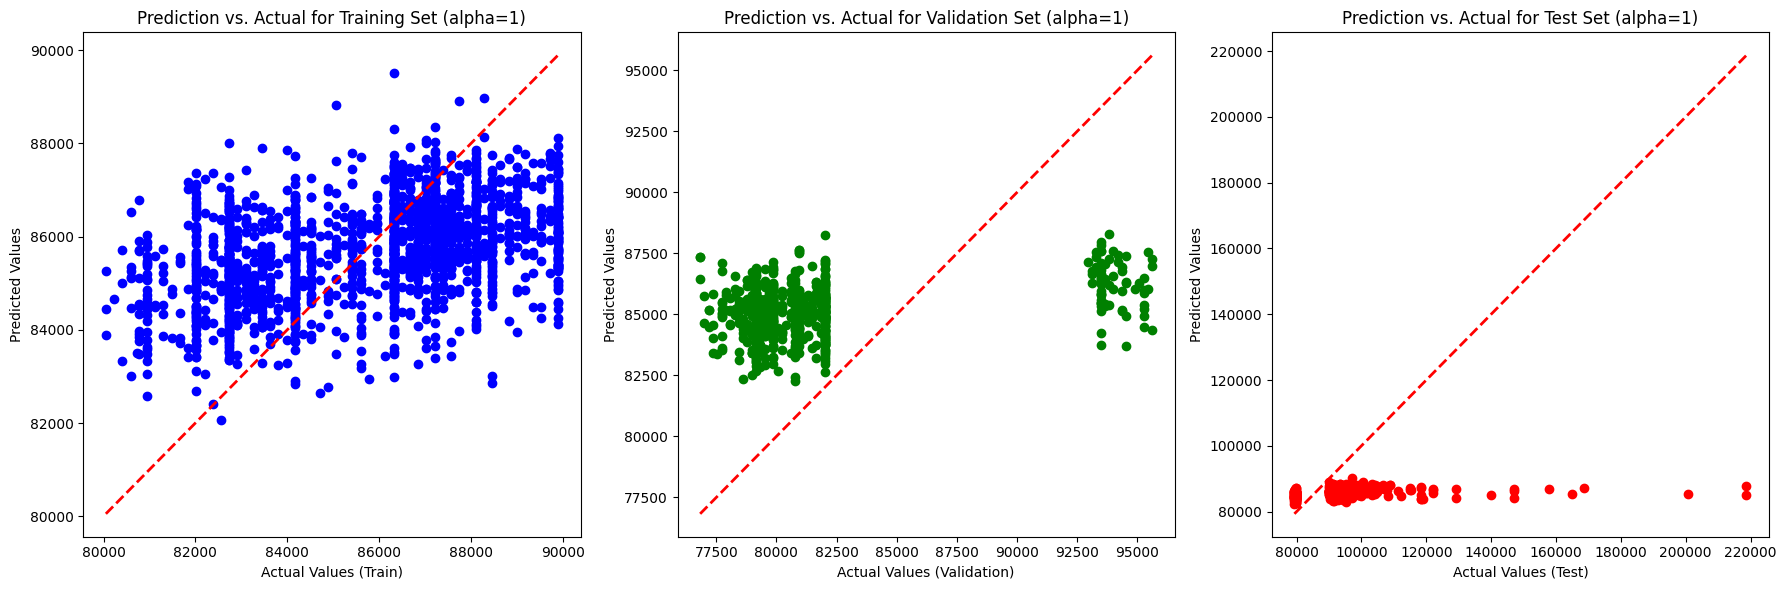

In [ ]:
plt.figure(figsize=(18, 6))

# Prediction vs Actual for Training Set
plt.subplot(1, 3, 1)
plt.scatter(y_train, train_preds, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel('Actual Values (Train)')
plt.ylabel('Predicted Values')
plt.title('Prediction vs. Actual for Training Set (alpha=1)')

# Prediction vs Actual for Validation Set
plt.subplot(1, 3, 2)
plt.scatter(y_val, val_preds, color='green')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel('Actual Values (Validation)')
plt.ylabel('Predicted Values')
plt.title('Prediction vs. Actual for Validation Set (alpha=1)')

# Prediction vs Actual for Test Set
plt.subplot(1, 3, 3)
plt.scatter(y_test, test_preds, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel('Actual Values (Test)')
plt.ylabel('Predicted Values')
plt.title('Prediction vs. Actual for Test Set (alpha=1)')

plt.tight_layout()

> Results: 
* alpha=0.01 and alpha=0.1: Low regularization leads to higher RMSE on validation and test sets, showing inadequate generalization.
* alpha=1: Achieves the best balance, with the lowest RMSE across validation and test sets, indicating effective regularization and generalization.
* alpha=10: Higher RMSE suggests underfitting due to excessive regularization.
* alpha=100: Significantly higher RMSE across all datasets, indicating severe underfitting and poor model performance.

<hr>

### E.5 Business Impact from Current Model Performance

In [ ]:
# Define feature list for analysis
features_list = ['10percentage', '12percentage', 'Degree', 'Specialization', 'collegeGPA', 'English', 
                 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 
                 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 
                 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 
                 'GPA_Quant_Interaction', '10_12_Percentage_Interaction', 'GPA_Category']


# Extract feature coefficients
coefficients = pd.DataFrame({
    'Feature': features_list,
    'Coefficient': la.coef_.flatten()
})

# Sort by absolute value of coefficient for better insights
coefficients['Absolute_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the coefficients
print("Feature Coefficients (Impact on Salary Prediction):")
print(coefficients)


Feature Coefficients (Impact on Salary Prediction):
                         Feature  Coefficient  Absolute_Coefficient
7                          Quant   800.966561            800.966561
0                   10percentage   450.254832            450.254832
21         GPA_Quant_Interaction  -450.233609            450.233609
1                   12percentage   310.774859            310.774859
4                     collegeGPA   284.041854            284.041854
22  10_12_Percentage_Interaction  -280.968778            280.968778
5                        English   275.099434            275.099434
11               ComputerScience  -251.496668            251.496668
8                         Domain   187.054165            187.054165
16             conscientiousness  -174.723133            174.723133
23                  GPA_Category  -172.017351            172.017351
9            ComputerProgramming   153.939062            153.939062
20         openess_to_experience  -149.003599            149.003

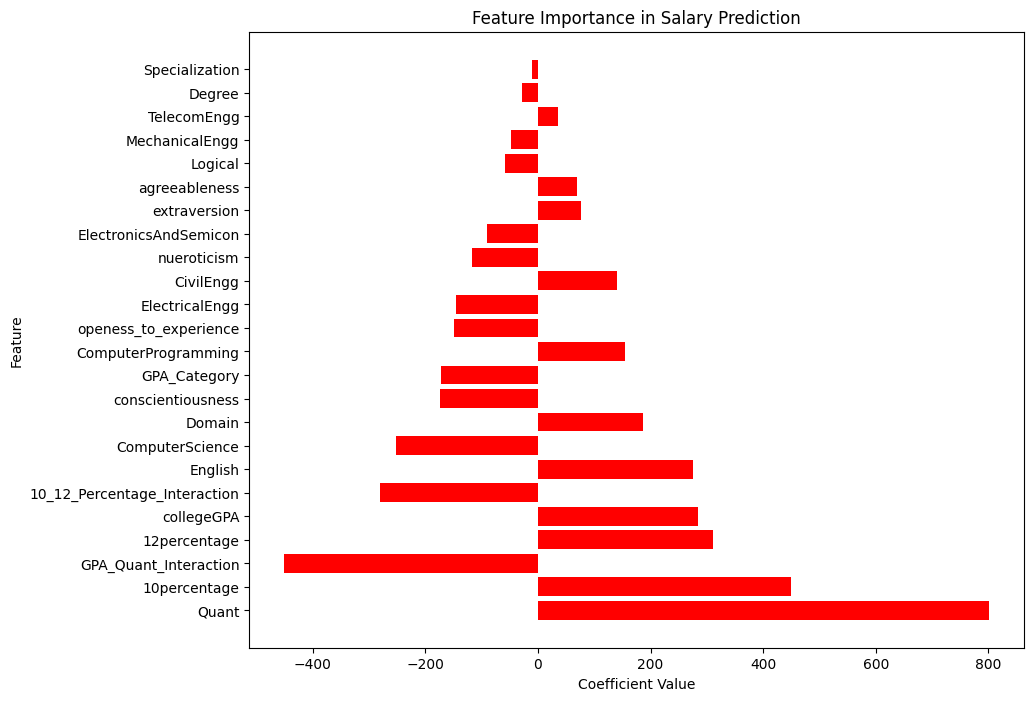

In [ ]:
# Plot the coefficients for a better understanding
plt.figure(figsize=(10, 8))
plt.barh(coefficients['Feature'], coefficients['Coefficient'], color='red')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Salary Prediction')
plt.show()


In [ ]:

# Business Insights based on the feature coefficients
for index, row in coefficients.iterrows():
    feature = row['Feature']
    coef = row['Coefficient']
    
    if coef > 0:
        print(f"Positive Impact: '{feature}' increases the predicted salary. Higher values for '{feature}' correlate with higher salaries.")
    else:
        print(f"Negative Impact: '{feature}' decreases the predicted salary. Higher values for '{feature}' correlate with lower salaries.")

Positive Impact: 'Quant' increases the predicted salary. Higher values for 'Quant' correlate with higher salaries.
Positive Impact: '10percentage' increases the predicted salary. Higher values for '10percentage' correlate with higher salaries.
Negative Impact: 'GPA_Quant_Interaction' decreases the predicted salary. Higher values for 'GPA_Quant_Interaction' correlate with lower salaries.
Positive Impact: '12percentage' increases the predicted salary. Higher values for '12percentage' correlate with higher salaries.
Positive Impact: 'collegeGPA' increases the predicted salary. Higher values for 'collegeGPA' correlate with higher salaries.
Negative Impact: '10_12_Percentage_Interaction' decreases the predicted salary. Higher values for '10_12_Percentage_Interaction' correlate with lower salaries.
Positive Impact: 'English' increases the predicted salary. Higher values for 'English' correlate with higher salaries.
Negative Impact: 'ComputerScience' decreases the predicted salary. Higher val

> Results: 
* Positive Impacts: Features such as Quant, 10percentage, 12percentage, collegeGPA, English, Domain, ComputerProgramming, CivilEngg, TelecomEngg, extraversion, and agreeableness increase predicted salaries. Higher values in these features correlate with higher salaries, suggesting that candidates with strong academic performance, domain expertise, and interpersonal skills are likely to command higher salaries.
* Negative Impacts: Features like GPA_Quant_Interaction, 10_12_Percentage_Interaction, ComputerScience, conscientiousness, GPA_Category, openess_to_experience, ElectricalEngg, nueroticism, ElectronicsAndSemicon, Logical, MechanicalEngg, Degree, and Specialization decrease predicted salaries. This indicates that higher values for these features are associated with lower salaries, suggesting that certain interactions and characteristics may have a diminishing effect on salary.
* Business Use Case: Companies should focus on candidates with strong quantitative skills, programming expertise, and communication abilities to enhance salary outcomes. Educational institutions should aim to improve these skills while also managing factors that negatively impact salaries.

<hr>

## F. Experiment Outcomes

In [ ]:
final_experiment_outcome = 'Hypothesis Rejected'

> Key Learnings: 
* Higher alpha values, particularly alpha=10 and alpha=100, led to underfitting and significantly higher RMSE across training, validation, and test datasets.
* The best predictive performance was observed with alpha=1, suggesting that moderate regularization provides the best balance between bias and variance in Lasso Regression.
* Over-regularization with high alpha values negatively impacts model accuracy, leading to worse performance across all datasets.

> Recommendations for Next Experiment: 
* Test a wider range of moderate alpha values (between 0.1 and 10) to fine-tune regularization strength and further improve the model's balance between generalization and accuracy.
* Compare the results of Lasso Regression with Ridge Regression to assess whether L1 or L2 regularization is more effective for this dataset.
* Explore other feature selection methods alongside Lasso Regression to evaluate their impact on model performance and interpretability.

<hr>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=12a1f7ba-c963-4534-995e-794885094f8b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>